<a href="https://colab.research.google.com/github/VINI-DS001/roteiro-cnn/blob/master/Equipe1_Roteiro_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade - Redes neurais convolucionais

##Preparar o ambiente de execução

In [ ]:
# --- 1. Obter os Dados Necessários ---

# Importar bibliotecas essenciais
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


## Obter os dados necessários para o problema a ser resolvido e processar os dados

Tamanho do treino: (50000, 32, 32, 3)
Tamanho do teste: (10000, 32, 32, 3)


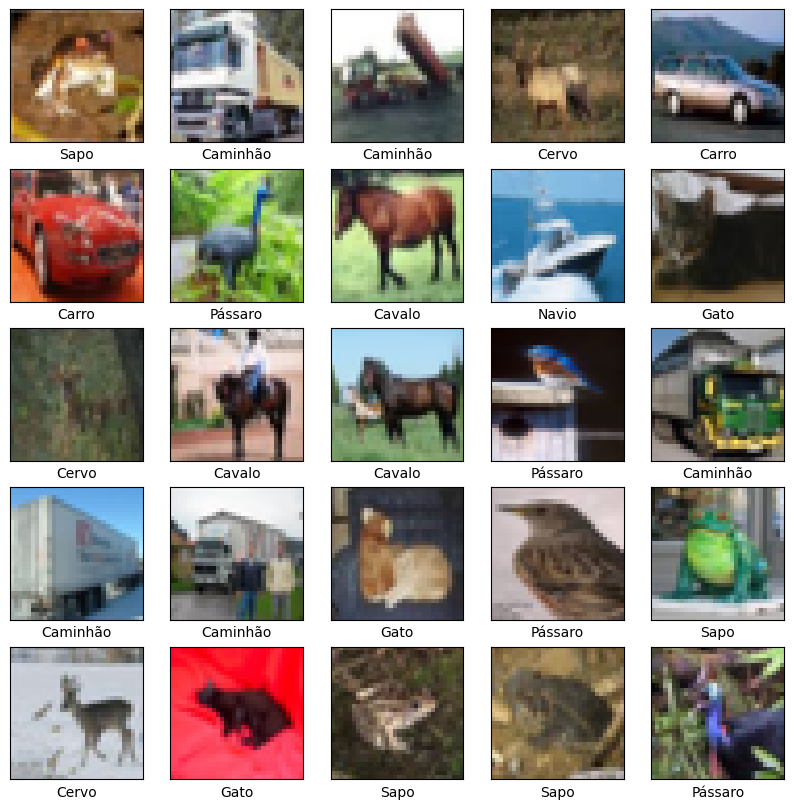

In [ ]:
# --- 2. Processar os Dados ---

# Normalização: valores de pixel entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verificar o formato dos dados
print(f'Tamanho do treino: {x_train.shape}')
print(f'Tamanho do teste: {x_test.shape}')

# Visualizar algumas imagens do dataset
class_names = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

##Configurar o ambiente e treinar o modelo

In [ ]:
# --- 3. Configuração do Ambiente e Treinamento do Modelo ---

# Definir o modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Saída para 10 classes
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Avaliação final no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Acurácia no conjunto de teste: {test_acc}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3452 - loss: 1.7526 - val_accuracy: 0.5456 - val_loss: 1.2739
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5775 - loss: 1.1922 - val_accuracy: 0.6078 - val_loss: 1.1078
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6380 - loss: 1.0351 - val_accuracy: 0.6294 - val_loss: 1.0448
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.6717 - loss: 0.9344 - val_accuracy: 0.6682 - val_loss: 0.9494
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.7053 - loss: 0.8457 - val_accuracy: 0.6593 - val_loss: 0.9894
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.7234 - loss: 0.7886 - val_accuracy: 0.6897 - val_loss: 0.8936
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7431 - loss: 0.7352 - val_accuracy: 0.6880 - val_loss: 0.9278
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7590 -

##Salvar e carregar os resultados obtidos

In [ ]:
# --- 4. Salvar e Carregar os Resultados ---

# Salvar o modelo
model.save('cnn_cifar10.keras')
# Para carregar o modelo em futuras previsões
# model = tf.keras.models.load_model('cnn_cifar10.keras')

##Realizar a detecção com base nos resultados do modelo treinado

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


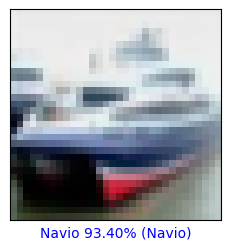

In [ ]:
import numpy as np

# Adicionar camada de Softmax para obter probabilidades ao invés de logits
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]  # Ajuste para comparar apenas valores individuais
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])  # Obtém o índice com maior probabilidade
    color = 'blue' if predicted_label == true_label else 'red'

    # Ajuste para exibir a probabilidade correta com Softmax
    plt.xlabel(f'{class_names[predicted_label]} {100 * predictions_array[i][predicted_label]:.2f}% ({class_names[true_label]})', color=color)

# Exemplo de uso da função plot_image para a primeira imagem
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(1, predictions, y_test, x_test)
plt.show()

